In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [17]:
latexify(width_scale_factor=3, fig_height=1.5)

In [12]:
def softmax(a):
    e = jnp.exp((1.0 * jnp.array(a)))
    return e / jnp.sum(e)

In [13]:
def plot_softmax_distribution(T, a, save_name, fig=None, axs=None):
    ind = jnp.arange(1, len(a) + 1)

    plt.figure()
    plt.bar(ind, softmax(a / T))

    plt.title(f"T = {T}")
    plt.ylim(0, 1)
    plt.xlabel("$logits$")
    plt.ylabel("$Probability$")
    ax = plt.gca()
    ax.set_xticklabels([])

    if len(save_name) > 0:
        savefig(save_name)

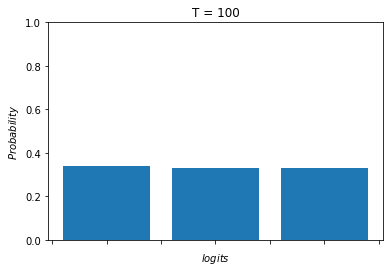

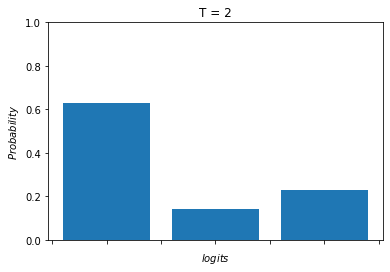

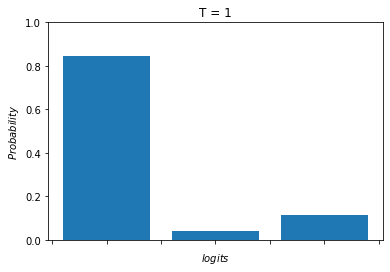

In [18]:
T_array = [100, 2, 1]
a = jnp.array([3, 0, 1])

for i, T in enumerate(T_array):
    plot_softmax_distribution(T, a, f"softmax_dist_{i+1}_latexified")

### Interactive figure for softmax distribution

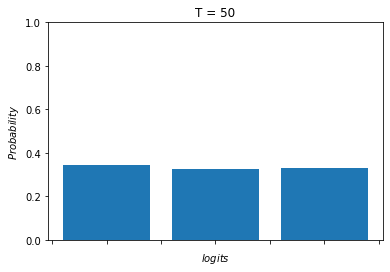

In [7]:
from ipywidgets import interact


@interact(T=(1, 100))
def generate_interactinve_graph(T):
    a = jnp.array([3, 0, 1])
    plot_softmax_distribution(T, a, "")